In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [4]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text

In [8]:
soup = BeautifulSoup(source,'lxml')
My_Table = soup.find('table',{'class':'wikitable sortable'})

In [9]:
#First two columns
headers = My_Table.find_all('th')
headers = [th.text.strip() for th in headers]
headers = headers[:2]
x = headers[1].split('\xa0')
x = ' '.join(x)
headers.pop()
headers.append(x)
headers

['Location', 'London borough']

In [10]:
rows = []
for tr in My_Table.find_all('tr'):
    tds = tr.find_all('td')
    rows.append(tds)
    if not tds:
        continue
del rows[0]

col_0 = []
for i in range(len(rows)):
    col_0.append(rows[i][0])
Locations = []
for location in col_0:
    Locations.append(location.text)
for index, ele in enumerate(Locations):
    if '(' in ele:
        Locations[index] = Locations[index].split('(')[0]
for index, ele in enumerate(Locations):
    if ',' in ele:
        Locations[index] = Locations[index].split(',')[0]        
    
col_1 = []
for i in range(len(rows)):
    col_1.append(rows[i][1])
Boroughs = []
for borough in col_1:
    Boroughs.append(borough.text)
for index, ele in enumerate(Boroughs):
    if '[' in ele:
        Boroughs[index] = Boroughs[index].split('[')[0]
for index, ele in enumerate(Boroughs):
    if ',' in ele:
        Boroughs[index] = Boroughs[index].split(',')[0]

In [11]:
len(Locations)

532

In [12]:
# Convert address in latitude and longitude

In [19]:
latitude = []
longitude = []
i=1
print(i)
for i in range(1,len(Locations)):
    print(i)
    address = str(Locations[i]+', '+ Boroughs[i] + ', England')
    geolocator = Nominatim(user_agent="london_explorer")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geolocator.geocode(address)
    try: 
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append("Not Found")
        longitude.append("Not Found")
    
print('Done!')


1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
headers.append('Latitude')
headers.append('Longitude')
if len(headers)>4:
    headers = headers[:4]

In [21]:
df = pd.DataFrame(list(zip(Locations, Boroughs, latitude, longitude)), 
               columns = headers) 
df.head()

Location London borough   Latitude  Longitude
0   Abbey Wood         Bexley    51.5081  -0.273261
1        Acton         Ealing    51.3573 -0.0408444
2    Addington        Croydon    51.3797 -0.0742821
3   Addiscombe        Croydon    51.4354   0.125965
4  Albany Park         Bexley  Not Found  Not Found

In [22]:
#To back-up file 
df.to_pickle('London_data.csv')
df.to_csv('London_data1.csv')
# To read again, use df = pd.read_pickle('London_Data')

In [23]:
#Delete rows with locations not having latitude and longitude values
df = df[df.Latitude != "Not Found"]

In [24]:
df.shape

(525, 4)

In [25]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['London borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 37 boroughs and 525 neighborhoods.


In [26]:
address = 'London, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


In [27]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[lat_e, long_e], zoom_start=10)

# add markers to map
for lat, lng, borough, location in zip(df['Latitude'], df['Longitude'], df['London borough'], df['Location']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [28]:
# df[df.Longitude > -0.5 & df.Longitude < 0.3]
df = df[df.Longitude > -0.5]
df = df[df.Longitude < 0.3]

In [29]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[lat_e, long_e], zoom_start=10)

# add markers to map
for lat, lng, borough, location in zip(df['Latitude'], df['Longitude'], df['London borough'], df['Location']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [34]:
LIMIT = 200
CLIENT_ID = 'EI4IWX3FF5XUPB4J0E4KFZGGYCKFTBBOJVGPFJVBQI0VJGGN' # your Foursquare ID
CLIENT_SECRET = '0CSH244G4CNKK3HVQFTVY32W1R5TVT2JUYEFN01I5IRMQJEC' # your Foursquare Secret
VERSION = '20191116' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EI4IWX3FF5XUPB4J0E4KFZGGYCKFTBBOJVGPFJVBQI0VJGGN
CLIENT_SECRET:0CSH244G4CNKK3HVQFTVY32W1R5TVT2JUYEFN01I5IRMQJEC


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
London_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Abbey Wood
Acton
Addington
Addiscombe
Aldborough Hatch
Aldgate
Aldwych
Alperton
Anerley
Angel
Aperfield
Archway
Ardleigh Green
Arkley
Arnos Grove
Balham
Bankside
Barbican
Barking
Barkingside
Barnehurst
Barnes
Barnes Cray
Barnet Gate
Barnet 
Barnsbury
Battersea
Bayswater
Beckenham
Beckton
Becontree
Becontree Heath
Beddington
Bedford Park
Belgravia
Bellingham
Belmont
Belmont
Belsize Park
Belvedere
Bermondsey
Berrylands
Bethnal Green
Bexley 
Bexleyheath 
Bickley
Biggin Hill
Blackfen
Blackfriars
Blackheath
Blackheath Royal Standard
Blackwall
Blendon
Bloomsbury
Botany Bay
Bounds Green
Bow
Bowes Park
Brentford
Brent Cross
Brent Park
Brimsdown
Brixton
Bromley
Bromley 
Brompton
Brondesbury
Brunswick Park
Bulls Cross
Burnt Oak
Burroughs
Camberwell
Cambridge Heath
Camden Town
Cann Hall
Canning Town
Canonbury
Carshalton
Castelnau
Castle Green
Catford
Chadwell Heath
Chalk Farm
Charing Cross
Charlton
Chase Cross
Cheam
Chelsea
Chelsfield
Chessington
Childs Hill
Chinatown
Chinbrook
Chingford
Chislehu

In [38]:
print(London_venues.shape)
London_venues.head()

(12118, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Abbey Wood               51.50814               -0.273261   
1   Abbey Wood               51.50814               -0.273261   
2   Abbey Wood               51.50814               -0.273261   
3   Abbey Wood               51.50814               -0.273261   
4   Abbey Wood               51.50814               -0.273261   

                                  Venue  Venue Latitude  Venue Longitude  \
0                     London Star Hotel       51.509624        -0.272456   
1  Dragonfly Brewery at George & Dragon       51.507378        -0.271702   
2                          The Aeronaut       51.508376        -0.275216   
3                              MrBakeme       51.508452        -0.268543   
4                          Acton Centre       51.506608        -0.266878   

         Venue Category  
0                 Hotel  
1               Brewery  
2                   Pub  
3              Creperie  
4  Gym / Fitness Center

In [39]:
# Number of venues for each nrighborhood
London_venues.groupby('Neighborhood')
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 409 uniques categories.


In [50]:
London_restaurants = London_venues[London_venues['Venue Category'].str.contains("Restaurant")]

In [51]:
print('There are {} unique categories or cusines available in London.'.format(len(London_restaurants['Venue Category'].unique())))

There are 82 unique categories or cusines available in London.


In [52]:
# one hot encoding
London_onehot = pd.get_dummies(London_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
5    Abbey Wood                  0                   0                    0   
12   Abbey Wood                  0                   0                    0   
18   Abbey Wood                  0                   0                    0   
20   Abbey Wood                  0                   0                    0   
28        Acton                  0                   0                    0   

    Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
5                  0                       0                 0   
12                 0                       0                 0   
18                 0                       0                 0   
20                 0                       0                 0   
28                 0                       0                 0   

    Australian Restaurant  Austrian Restaurant  Brazilian Restaurant  ...  \
5                       0                    0                     0  ...   
12                      0                    0                     0  ...   
18                      0                    0                     0  ...   
20                      0                    0                     0  ...   
28                      0                    0                     0  ...   

    Szechuan Restaurant  Tapas Restaurant  Thai Restaurant  \
5                     0                 0                0   
12                    0                 0                0   
18                    0                 0                0   
20                    0                 0                0   
28                    0                 0                0   

    Turkish Restaurant  Udon Restaurant  Vegetarian / Vegan Restaurant  \
5                    0                0                              0   
12                   0                0                              0   
18                   0                0                              0   
20                   0                0                              0   
28                   0                0                              0   

    Veneto Restaurant  Vietnamese Restaurant  Xinjiang Restaurant  \
5                   0                      0                    0   
12                  0                      0                    0   
18                  0                      0                    0   
20                  0                      0                    0   
28                  0                      0                    0   

    Yoshoku Restaurant  
5                    0  
12                   0  
18                   0  
20                   0  
28                   0  

[5 rows x 83 columns]

In [53]:
print('There are {} restaurants in London with {} different style of cuisines.'.format(London_onehot.shape[0],(London_onehot.shape[1]-1)))

There are 2573 restaurants in London with 82 different style of cuisines.


In [54]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()
London_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0          Abbey Wood           0.000000            0.000000   
1               Acton           0.000000            0.000000   
2           Addington           0.000000            0.000000   
3          Addiscombe           0.000000            0.000000   
4    Aldborough Hatch           0.000000            0.000000   
5             Aldgate           0.000000            0.000000   
6             Aldwych           0.000000            0.000000   
7            Alperton           0.000000            0.000000   
8             Anerley           0.052632            0.000000   
9               Angel           0.000000            0.000000   
10          Aperfield           0.000000            0.000000   
11             Arkley           0.000000            0.000000   
12        Arnos Grove           0.000000            0.000000   
13             Balham           0.000000            0.000000   
14           Bankside           0.000000            0.000000   
15           Barbican           0.000000            0.000000   
16        Barkingside           0.000000            0.000000   
17         Barnehurst           0.000000            0.000000   
18        Barnes Cray           0.000000            0.000000   
19            Barnet            0.000000            0.000000   
20        Barnet Gate           0.000000            0.000000   
21          Barnsbury           0.000000            0.000000   
22          Battersea           0.000000            0.027778   
23          Bayswater           0.000000            0.000000   
24          Becontree           0.000000            0.000000   
25    Becontree Heath           0.000000            0.000000   
26         Beddington           0.000000            0.000000   
27       Bedford Park           0.000000            0.000000   
28         Bellingham           0.000000            0.000000   
29            Belmont           0.000000            0.000000   
..                ...                ...                 ...   
374           Welling           0.000000            0.000000   
375           Wembley           0.000000            0.000000   
376     West Brompton           0.000000            0.000000   
377      West Drayton           0.000000            0.000000   
378       West Ealing           0.000000            0.000000   
379        West Green           0.000000            0.000000   
380          West Ham           0.000000            0.000000   
381    West Hampstead           0.000000            0.000000   
382        West Heath           0.000000            0.000000   
383       West Hendon           0.000000            0.000000   
384   West Kensington           0.000000            0.000000   
385      West Norwood           0.000000            0.000000   
386      West Wickham           0.000000            0.000000   
387    Westcombe Park           0.000000            0.000000   
388       Westminster           0.000000            0.000000   
389         Whetstone           0.000000            0.000000   
390        White City           0.000000            0.000000   
391       Whitechapel           0.000000            0.000000   
392           Whitton           0.000000            0.000000   
393          Widmore            0.000000            0.000000   
394         Willesden           0.000000            0.000000   
395         Wimbledon           0.000000            0.000000   
396    Winchmore Hill           0.000000            0.000000   
397        Wood Green           0.000000            0.000000   
398          Woodford           0.000000            0.000000   
399    Woodford Green           0.000000            0.000000   
400         Woodlands           0.000000            0.000000   
401     Woodside Park           0.000000            0.090909   
402          Woolwich           0.000000            0.000000   
403           Yeading           0.000000            0.000000   

     American Restaurant  Arepa Restaura

In [55]:
London_grouped.shape

(404, 83)

In [57]:
num_top_rest = 3

for hood in London_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----Abbey Wood----
                  venue  freq
0    Chinese Restaurant  0.50
1  Fast Food Restaurant  0.25
2   Japanese Restaurant  0.25


----Acton----
                    venue  freq
0      Chinese Restaurant   1.0
1       Afghan Restaurant   0.0
2  Okonomiyaki Restaurant   0.0


----Addington----
                    venue  freq
0    Fast Food Restaurant   0.5
1      Chinese Restaurant   0.5
2  Okonomiyaki Restaurant   0.0


----Addiscombe----
                     venue  freq
0        Indian Restaurant   1.0
1        Afghan Restaurant   0.0
2  North Indian Restaurant   0.0


----Aldborough Hatch----
                       venue  freq
0  Middle Eastern Restaurant   0.1
1          Indian Restaurant   0.1
2                 Restaurant   0.1


----Aldgate----
                 venue  freq
0           Restaurant  0.24
1    French Restaurant  0.14
2  Japanese Restaurant  0.10


----Aldwych----
                       venue  freq
0          Indian Restaurant  0.50
1           Asian Restauran

                venue  freq
0  Italian Restaurant   0.2
1          Restaurant   0.1
2   French Restaurant   0.1


----Chalk Farm----
                venue  freq
0          Restaurant  0.25
1  Spanish Restaurant  0.12
2    Sushi Restaurant  0.06


----Charing Cross----
                     venue  freq
0          Thai Restaurant   1.0
1        Afghan Restaurant   0.0
2  New American Restaurant   0.0


----Charlton----
                     venue  freq
0        Indian Restaurant   1.0
1        Afghan Restaurant   0.0
2  North Indian Restaurant   0.0


----Chase Cross----
                 venue  freq
0   Italian Restaurant  0.43
1  American Restaurant  0.14
2   Turkish Restaurant  0.14


----Cheam----
                 venue  freq
0   Italian Restaurant  0.25
1    French Restaurant  0.19
2  Japanese Restaurant  0.12


----Chelsea----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2            Restaurant   0.0


----Childs Hill----
                 v

                venue  freq
0  English Restaurant   1.0
1  Russian Restaurant   0.0
2    Ramen Restaurant   0.0


----Falconwood----
                        venue  freq
0          Falafel Restaurant  0.13
1  Modern European Restaurant  0.13
2          Italian Restaurant  0.13


----Farringdon----
                   venue  freq
0   Fast Food Restaurant   0.2
1    American Restaurant   0.2
2  Portuguese Restaurant   0.2


----Feltham----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2            Restaurant   0.0


----Finchley----
                venue  freq
0  Italian Restaurant  0.31
1    Sushi Restaurant  0.12
2  Turkish Restaurant  0.12


----Finsbury----
                  venue  freq
0  Fast Food Restaurant  0.67
1  Caribbean Restaurant  0.33
2      Ramen Restaurant  0.00


----Finsbury Park----
                 venue  freq
0  Japanese Restaurant  0.11
1   Italian Restaurant  0.11
2    French Restaurant  0.11


----Foots Cray----
         

                 venue  freq
0  Japanese Restaurant   0.5
1           Restaurant   0.5
2    Afghan Restaurant   0.0


----Holland Park----
                      venue  freq
0      Fast Food Restaurant  0.17
1  Mediterranean Restaurant  0.08
2          Greek Restaurant  0.08


----Holloway----
                venue  freq
0  English Restaurant   1.0
1  Russian Restaurant   0.0
2    Ramen Restaurant   0.0


----Homerton----
                      venue  freq
0  Mediterranean Restaurant  0.25
1        Italian Restaurant  0.25
2         Indian Restaurant  0.25


----Honor Oak----
                     venue  freq
0        Indian Restaurant   1.0
1        Afghan Restaurant   0.0
2  North Indian Restaurant   0.0


----Hook----
                   venue  freq
0     Italian Restaurant  0.50
1        Thai Restaurant  0.25
2  Portuguese Restaurant  0.12


----Horn Park----
                      venue  freq
0         Indian Restaurant  0.25
1  Mediterranean Restaurant  0.25
2        Italian Restauran

               venue  freq
0  Korean Restaurant  0.33
1  Indian Restaurant  0.33
2   Sushi Restaurant  0.33


----New Malden----
                  venue  freq
0  Fast Food Restaurant   0.5
1     Indian Restaurant   0.5
2     Afghan Restaurant   0.0


----New Southgate----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2            Restaurant   0.0


----Newbury Park----
                venue  freq
0    Asian Restaurant  0.33
1  Italian Restaurant  0.33
2  Falafel Restaurant  0.33


----Newington----
               venue  freq
0  Indian Restaurant   0.5
1         Restaurant   0.5
2  Afghan Restaurant   0.0


----Noak Hill----
                venue  freq
0   Indian Restaurant  0.43
1  Italian Restaurant  0.29
2  Seafood Restaurant  0.14


----Norbiton----
                  venue  freq
0  Pakistani Restaurant   1.0
1     Afghan Restaurant   0.0
2            Restaurant   0.0


----North End----
                   venue  freq
0   Fast Food Restaura

                venue  freq
0   Indian Restaurant  0.17
1  Chinese Restaurant  0.17
2   French Restaurant  0.17


----Snaresbrook----
                venue  freq
0  Seafood Restaurant  0.11
1  Italian Restaurant  0.11
2  English Restaurant  0.07


----Somerstown----
                  venue  freq
0    Italian Restaurant  0.33
1     Indian Restaurant  0.33
2  Fast Food Restaurant  0.17


----South Croydon----
                           venue  freq
0          Vietnamese Restaurant  0.33
1             English Restaurant  0.17
2  Vegetarian / Vegan Restaurant  0.17


----South Hackney----
                     venue  freq
0     Fast Food Restaurant  0.33
1  North Indian Restaurant  0.17
2    Portuguese Restaurant  0.17


----South Harrow----
                     venue  freq
0       Turkish Restaurant   1.0
1        Afghan Restaurant   0.0
2  New American Restaurant   0.0


----South Hornchurch----
                    venue  freq
0      Italian Restaurant  0.23
1       French Restaurant  0.12

                venue  freq
0   French Restaurant  0.22
1          Restaurant  0.11
2  English Restaurant  0.11


----Tower Hill----
                  venue  freq
0    Italian Restaurant  0.27
1  Ethiopian Restaurant  0.09
2      Kebab Restaurant  0.09


----Tufnell Park----
                venue  freq
0   Indian Restaurant  0.25
1  Italian Restaurant  0.25
2     Thai Restaurant  0.25


----Tulse Hill----
                      venue  freq
0         Indian Restaurant  0.25
1  Mediterranean Restaurant  0.25
2        Italian Restaurant  0.25


----Turnpike Lane----
                 venue  freq
0   Italian Restaurant  0.36
1    Indian Restaurant  0.18
2  Japanese Restaurant  0.09


----Upminster----
                     venue  freq
0        Indian Restaurant   1.0
1        Afghan Restaurant   0.0
2  North Indian Restaurant   0.0


----Upminster Bridge----
                venue  freq
0  Chinese Restaurant  0.67
1  Turkish Restaurant  0.33
2   Afghan Restaurant  0.00


----Upper Clapton----


In [58]:
# A function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
#Creating a new dataframe and displaying the top 10 restaurants based on occurance and cuisine for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = London_grouped['Neighborhood']


for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0        Abbey Wood         Chinese Restaurant   Japanese Restaurant   
1             Acton         Chinese Restaurant    Yoshoku Restaurant   
2         Addington       Fast Food Restaurant    Chinese Restaurant   
3        Addiscombe          Indian Restaurant    Yoshoku Restaurant   
4  Aldborough Hatch  Middle Eastern Restaurant     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant    Yoshoku Restaurant      Halal Restaurant   
1      Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
2    Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
3      Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
4            Restaurant    Italian Restaurant    English Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Falafel Restaurant   Filipino Restaurant     French Restaurant   
1   Filipino Restaurant     French Restaurant     German Restaurant   
2   Filipino Restaurant     French Restaurant     German Restaurant   
3   Filipino Restaurant     French Restaurant     German Restaurant   
4       Thai Restaurant      Asian Restaurant      Sushi Restaurant   

    9th Most Common Venue  10th Most Common Venue  
0       German Restaurant  Gluten-free Restaurant  
1  Gluten-free Restaurant        Greek Restaurant  
2  Gluten-free Restaurant        Greek Restaurant  
3  Gluten-free Restaurant        Greek Restaurant  
4    Cantonese Restaurant       French Restaurant

In [60]:
# Creating new dataframe to determine best k value by dropping first column
London_clustering_testing = London_grouped.drop('Neighborhood', 1)

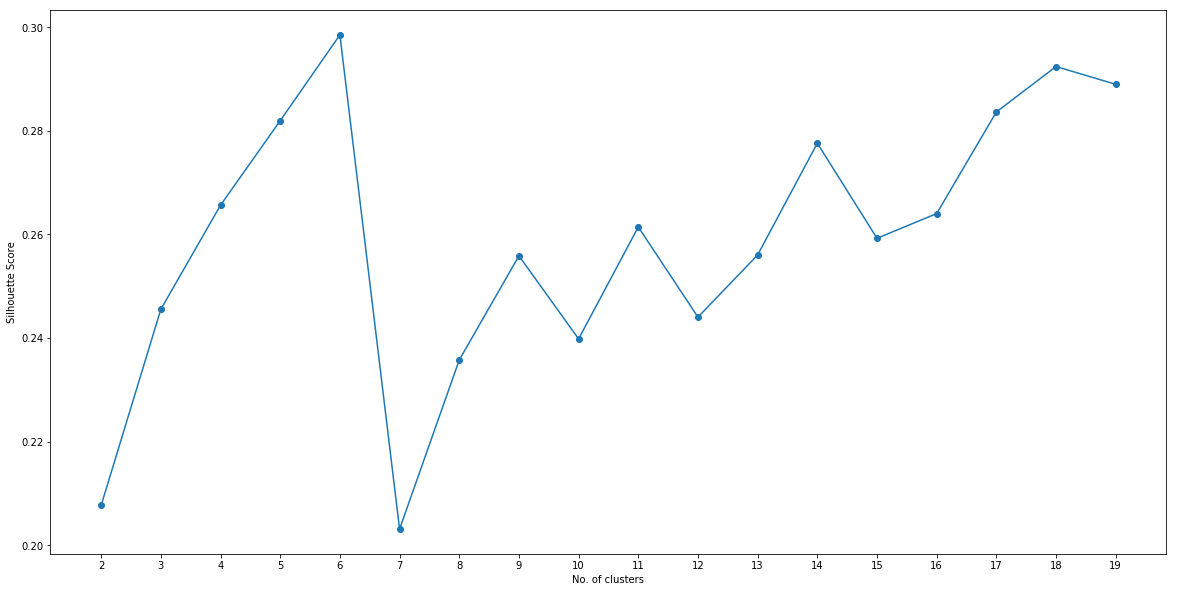

In [61]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 20

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = London_clustering_testing
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [62]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

6

In [63]:
# set number of clusters
kclusters = opt

London_grouped_clustering = London_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 1, 3, 3, 1, 4, 3, 2], dtype=int32)

In [64]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = London_restaurants

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
London_merged.fillna(0)
London_merged.head() # check the last columns!

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
5    Abbey Wood              51.508140               -0.273261   
12   Abbey Wood              51.508140               -0.273261   
18   Abbey Wood              51.508140               -0.273261   
20   Abbey Wood              51.508140               -0.273261   
28        Acton              51.357319               -0.040844   

                         Venue  Venue Latitude  Venue Longitude  \
5            Amigo's Peri Peri       51.508396        -0.274561   
12      North China Restaurant       51.508251        -0.277435   
18                      Ming's       51.507456        -0.272260   
20                        Hasu       51.508167        -0.269494   
28  Number One Chinese Cuisine       51.354569        -0.042584   

          Venue Category  Cluster Labels 1st Most Common Venue  \
5   Fast Food Restaurant               2    Chinese Restaurant   
12    Chinese Restaurant               2    Chinese Restaurant   
18    Chinese Restaurant               2    Chinese Restaurant   
20   Japanese Restaurant               2    Chinese Restaurant   
28    Chinese Restaurant               2    Chinese Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5    Japanese Restaurant  Fast Food Restaurant    Yoshoku Restaurant   
12   Japanese Restaurant  Fast Food Restaurant    Yoshoku Restaurant   
18   Japanese Restaurant  Fast Food Restaurant    Yoshoku Restaurant   
20   Japanese Restaurant  Fast Food Restaurant    Yoshoku Restaurant   
28    Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5       Halal Restaurant    Falafel Restaurant   Filipino Restaurant   
12      Halal Restaurant    Falafel Restaurant   Filipino Restaurant   
18      Halal Restaurant    Falafel Restaurant   Filipino Restaurant   
20      Halal Restaurant    Falafel Restaurant   Filipino Restaurant   
28  Fast Food Restaurant   Filipino Restaurant     French Restaurant   

   8th Most Common Venue   9th Most Common Venue  10th Most Common Venue  
5      French Restaurant       German Restaurant  Gluten-free Restaurant  
12     French Restaurant       German Restaurant  Gluten-free Restaurant  
18     French Restaurant       German Restaurant  Gluten-free Restaurant  
20     French Restaurant       German Restaurant  Gluten-free Restaurant  
28     German Restaurant  Gluten-free Restaurant        Greek Restaurant

In [65]:
London_merged['Cluster Labels'].value_counts()

3    2297
1     105
4      49
2      46
0      45
5      31
Name: Cluster Labels, dtype: int64

In [68]:
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, vc in zip(London_merged['Venue Latitude'], London_merged['Venue Longitude'], London_merged['Venue'], London_merged['Cluster Labels'], London_merged['Venue Category']):
    label = folium.Popup(str(poi) +' (' +str(vc) + ') ['+ str(cluster)+']', parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [69]:
c1 = London_merged.loc[London_merged['Cluster Labels'] == 0, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c1.drop_duplicates()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1309    Bounds Green    Turkish Restaurant    Yoshoku Restaurant   
1907       Cann Hall    Turkish Restaurant    Italian Restaurant   
3859          Eltham    Turkish Restaurant    Yoshoku Restaurant   
3869    Emerson Park    Turkish Restaurant    Yoshoku Restaurant   
3934    Enfield Town    Turkish Restaurant    Yoshoku Restaurant   
5102     Harold Wood    Turkish Restaurant    Italian Restaurant   
7506    Old Coulsdon    Turkish Restaurant    Yoshoku Restaurant   
7546       Orpington    Italian Restaurant    Turkish Restaurant   
8596   Seven Sisters    Turkish Restaurant            Restaurant   
9143    South Harrow    Turkish Restaurant    Yoshoku Restaurant   
10481         Temple    Italian Restaurant    Turkish Restaurant   
10939   Upper Ruxley    Turkish Restaurant  Fast Food Restaurant   
11439    West Ealing    Turkish Restaurant    Yoshoku Restaurant   
11998       Woodford    Italian Restaurant    Turkish Restaurant   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1309            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
1907        Fast Food Restaurant    Yoshoku Restaurant      Greek Restaurant   
3859            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
3869            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
3934            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
5102   Middle Eastern Restaurant    Chinese Restaurant    Yoshoku Restaurant   
7506            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
7546          Yoshoku Restaurant      Greek Restaurant  Ethiopian Restaurant   
8596    Mediterranean Restaurant    Mexican Restaurant      Cuban Restaurant   
9143            Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
10481         Yoshoku Restaurant      Greek Restaurant  Ethiopian Restaurant   
10939         Yoshoku Restaurant      Halal Restaurant  Ethiopian Restaurant   
11439           Halal Restaurant  Ethiopian Restaurant    Falafel Restaurant   
11998         Yoshoku Restaurant      Greek Restaurant  Ethiopian Restaurant   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1309   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
1907   Ethiopian Restaurant    Falafel Restaurant   Filipino Restaurant   
3859   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
3869   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
3934   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
5102       Greek Restaurant    Falafel Restaurant  Fast Food Restaurant   
7506   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
7546     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
8596     Yoshoku Restaurant      Greek Restaurant    Falafel Restaurant   
9143   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
10481    Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
10939    Falafel Restaurant   Filipino Restaurant     French Restaurant   
11439  Fast Food Restaurant   Filipino Restaurant     French Restaurant   
11998    Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   

      9th Most Common Venue  10th Most Common Venue  
1309      German Restaurant  Gluten-free Restaurant  
1907      French Restaurant       German Restaurant  
3859      German Restaurant  Gluten-free Restaurant  
3869      German Restaurant  Gluten-free Restaurant  
3934      German Restaurant  Gluten-free Restaurant  
5102    Filipino Restaurant       French Restaurant  
7506      German Restaurant  Gluten-free Restaurant  
7546      French Restaurant       German Restaurant  
8596   Fast Food Restaurant     Filipino Restaurant  
9143      German Restaurant  Gluten-free Restaurant  
10481     French Restaurant       German Restaurant  
10939     Ge

In [70]:
c1_table = London_merged.loc[London_merged['Cluster Labels'] == 0, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c1_table['Venue Latitude'], c1_table['Venue Longitude'], c1_table['Venue'], c1_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [71]:
c2 = London_merged.loc[London_merged['Cluster Labels'] == 1, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c2.drop_duplicates()

Neighborhood        1st Most Common Venue  \
41              Addiscombe            Indian Restaurant   
245                Aldwych            Indian Restaurant   
616            Barnes Cray            Indian Restaurant   
622            Barnet Gate            Indian Restaurant   
848        Becontree Heath            Indian Restaurant   
969           Belsize Park  Eastern European Restaurant   
1221             Blackwall            Indian Restaurant   
2001               Catford         Fast Food Restaurant   
2187              Charlton            Indian Restaurant   
2393             Chingford            Indian Restaurant   
2686         Colliers Wood            Indian Restaurant   
2961              Cranford         Fast Food Restaurant   
3182        Crystal Palace            Indian Restaurant   
3648         East Finchley            Indian Restaurant   
4257           Forest Hill            Indian Restaurant   
4407            Gidea Park            Indian Restaurant   
4481          Grahame Park            Indian Restaurant   
4851            Haggerston            Indian Restaurant   
4861              The Hale            Indian Restaurant   
5094           Harold Hill            Indian Restaurant   
5099           Harold Park            Indian Restaurant   
5178    Harrow on the Hill            Indian Restaurant   
5208   Havering-atte-Bower            Indian Restaurant   
5227                 Hayes                   Restaurant   
5290            Herne Hill            Indian Restaurant   
5620             Honor Oak            Indian Restaurant   
5660               Hornsey            Indian Restaurant   
6386                   Lee         Fast Food Restaurant   
6544           Locksbottom         Fast Food Restaurant   
6644           Manor House                   Restaurant   
7008              Millwall         Fast Food Restaurant   
7235            New Malden         Fast Food Restaurant   
7268             Newington                   Restaurant   
7721            Paddington            Indian Restaurant   
8070              Plaistow             Kebab Restaurant   
8249          Queen's Park            Indian Restaurant   
8289              Ratcliff            Indian Restaurant   
9348              Southend            Indian Restaurant   
10204         Stroud Green         Fast Food Restaurant   
10510       Thornton Heath            Indian Restaurant   
10879            Upminster            Indian Restaurant   
10953                Upton         Fast Food Restaurant   
11251              Wapping            Indian Restaurant   
11264           Wealdstone                   Restaurant   
11396        West Brompton            Indian Restaurant   
11553       West Hampstead            Indian Restaurant   
11557           West Heath             Kebab Restaurant   
11629         West Norwood         Fast Food Restaurant   
11820             Widmore             Indian Restaurant   
12025            Woodlands            Indian Restaurant   

               2nd Most Common Venue      3rd Most Common Venue  \
41                Yoshoku Restaurant           Halal Restaurant   
245                 Asian Restaurant  Middle Eastern Restaurant   
616                 Greek Restaurant         Yoshoku Restaurant   
622                 Greek Restaurant         Yoshoku Restaurant   
848               Yoshoku Restaurant           Halal Restaurant   
969                Indian Restaurant           Halal Restaurant   
1221              Yoshoku Restaurant           Halal Restaurant   
2001               Indian Restaurant         Yoshoku Restaurant   
2187              Yoshoku Restaurant           Halal Restaurant   
2393              Yoshoku Restaurant           Halal Restaurant   
2686              Yoshoku Restaurant           Halal Restaurant   
2961               Indian Restaurant         Yoshoku Restaurant   
3182              Yoshoku Restaurant           Halal Restaurant   
3648            Fast Food Restaurant         Yoshoku Restaurant   

In [72]:
c2_table = London_merged.loc[London_merged['Cluster Labels'] == 1, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c2_table['Venue Latitude'], c2_table['Venue Longitude'], c2_table['Venue'], c2_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [73]:
c3 = London_merged.loc[London_merged['Cluster Labels'] == 2, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c3.drop_duplicates()

Neighborhood        1st Most Common Venue 2nd Most Common Venue  \
5            Abbey Wood           Chinese Restaurant   Japanese Restaurant   
28                Acton           Chinese Restaurant    Yoshoku Restaurant   
34            Addington         Fast Food Restaurant    Chinese Restaurant   
329               Angel           Chinese Restaurant    Yoshoku Restaurant   
379              Arkley           Chinese Restaurant    Yoshoku Restaurant   
837           Becontree           Turkish Restaurant    Chinese Restaurant   
911          Bellingham             Asian Restaurant    Chinese Restaurant   
1079            Bexley              Kebab Restaurant    Chinese Restaurant   
1199         Blackheath         Fast Food Restaurant    Chinese Restaurant   
1587        Bulls Cross  Eastern European Restaurant    Chinese Restaurant   
2651        Cockfosters         Fast Food Restaurant    Chinese Restaurant   
2692       Colney Hatch           Chinese Restaurant    Yoshoku Restaurant   
4251        Forest Gate           Chinese Restaurant    Yoshoku Restaurant   
4489        Grange Park         Fast Food Restaurant    Chinese Restaurant   
4552          Greenwich         Fast Food Restaurant    Chinese Restaurant   
5394         Hillingdon           Chinese Restaurant    Yoshoku Restaurant   
5719           The Hyde           Chinese Restaurant    Yoshoku Restaurant   
5785       Isle of Dogs             Asian Restaurant    Chinese Restaurant   
7434           Northolt           Chinese Restaurant    Yoshoku Restaurant   
8085        Ponders End           Chinese Restaurant    English Restaurant   
8266         Queensbury           Chinese Restaurant    Yoshoku Restaurant   
10159   Strawberry Hill        Vietnamese Restaurant    Chinese Restaurant   
10208           Sudbury           Chinese Restaurant    Yoshoku Restaurant   
10496    Temple Fortune           Chinese Restaurant    Yoshoku Restaurant   
10884  Upminster Bridge           Chinese Restaurant    Turkish Restaurant   
11184          Walworth            French Restaurant    Chinese Restaurant   
12105           Yeading         Fast Food Restaurant    Chinese Restaurant   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5      Fast Food Restaurant    Yoshoku Restaurant      Halal Restaurant   
28         Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
34       Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
329        Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
379        Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
837      Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
911      Yoshoku Restaurant  Himalayan Restaurant  Fast Food Restaurant   
1079       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
1199     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
1587       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
2651     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
2692       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
4251       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
4489     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
4552     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
5394       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
5719       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
5785     Yoshoku Restaurant  Himalayan Restaurant  Fast Food Restaurant   
7434       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
8085     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
8266       Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
10159    Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
10208      Halal Restaurant    Falafel Restaurant  Fast Food Restaurant   
10496      Halal Restauran

In [74]:
c3_table = London_merged.loc[London_merged['Cluster Labels'] == 2, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c3_table['Venue Latitude'], c3_table['Venue Longitude'], c3_table['Venue'], c3_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [75]:
c4 = London_merged.loc[London_merged['Cluster Labels'] == 3, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c4.drop_duplicates()

Neighborhood      1st Most Common Venue  \
53              Aldborough Hatch  Middle Eastern Restaurant   
143                      Aldgate                 Restaurant   
268                      Anerley      Vietnamese Restaurant   
334                    Aperfield         Italian Restaurant   
383                  Arnos Grove          Indian Restaurant   
443                       Balham         Italian Restaurant   
502                     Bankside         Italian Restaurant   
587                  Barkingside           Asian Restaurant   
624                      Barnet        Ethiopian Restaurant   
655                    Barnsbury      Portuguese Restaurant   
678                    Battersea         Chinese Restaurant   
781                    Bayswater         Italian Restaurant   
849                   Beddington   Mediterranean Restaurant   
870                 Bedford Park         Italian Restaurant   
915                      Belmont          Indian Restaurant   
975                    Belvedere      Indonesian Restaurant   
1006                  Berrylands         Italian Restaurant   
1066               Bethnal Green       Fast Food Restaurant   
1096                    Blackfen         Italian Restaurant   
1166                 Blackfriars       Himalayan Restaurant   
1204   Blackheath Royal Standard         Italian Restaurant   
1231                     Blendon         Italian Restaurant   
1332                         Bow           Greek Restaurant   
1357                   Brentford       Fast Food Restaurant   
1419                   Brimsdown       Caribbean Restaurant   
1518                     Brixton           Malay Restaurant   
1545                    Brompton       Fast Food Restaurant   
1595                   Burnt Oak          Korean Restaurant   
1611                   Burroughs  Middle Eastern Restaurant   
1664                  Camberwell         Italian Restaurant   
...                          ...                        ...   
10810              Turnpike Lane         Italian Restaurant   
10897              Upper Clapton         Italian Restaurant   
10934             Upper Holloway         English Restaurant   
10965                 Upton Park         Italian Restaurant   
11046                   Uxbridge                 Restaurant   
11090                     Waddon       Fast Food Restaurant   
11097                 Wallington           Halal Restaurant   
11140                Walthamstow                 Restaurant   
11161        Walthamstow Village       Fast Food Restaurant   
11203                 Wandsworth         English Restaurant   
11232                   Wanstead       Fast Food Restaurant   
11293                    Welling         Italian Restaurant   
11354                    Wembley         English Restaurant   
11406               West Drayton          Indian Restaurant   
11453                 West Green      Vietnamese Restaurant   
11511                   West Ham            Thai Restaurant   
11569                West Hendon         Italian Restaurant   
11606            West Kensington         Italian Restaurant   
11632               West Wickham                 Restaurant   
11665             Westcombe Park                 Restaurant   
11694                Westminster         Italian Restaurant   
11721                  Whetstone           Greek Restaurant   
11764                 White City       Fast Food Restaurant   
11800                Whitechapel         Italian Restaurant   
11827                    Whitton         Italian Restaurant   
11858                  Willesden           Sushi Restaurant   
11937                  Wimbledon  Middle Eastern Restaurant   
11943             Winchmore Hill       Fast Food Restaurant   
11985                 Wood Green                 Restaurant   
12038              Woodside Park       Fast Food Restaurant   

            2nd Most Common Venue          3rd Most Common Venue  \
53              Indian Restaurant            

In [77]:
c4_table = London_merged.loc[London_merged['Cluster Labels'] == 3, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c4_table['Venue Latitude'], c4_table['Venue Longitude'], c4_table['Venue'], c4_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters



In [78]:
c5 = London_merged.loc[London_merged['Cluster Labels'] == 4, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c5.drop_duplicates()

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
260           Alperton  Fast Food Restaurant     Yoshoku Restaurant   
562           Barbican  Fast Food Restaurant  Portuguese Restaurant   
1408        Brent Park  Fast Food Restaurant     Yoshoku Restaurant   
1539          Bromley   Fast Food Restaurant     Yoshoku Restaurant   
2263           Chelsea  Fast Food Restaurant     Yoshoku Restaurant   
2661         Colindale  Fast Food Restaurant     Yoshoku Restaurant   
2992        Crews Hill  Fast Food Restaurant      Afghan Restaurant   
3699      East Wickham  Fast Food Restaurant     Yoshoku Restaurant   
3946      Enfield Wash  Fast Food Restaurant     Yoshoku Restaurant   
4031           Feltham  Fast Food Restaurant     Yoshoku Restaurant   
4113          Finsbury  Fast Food Restaurant   Caribbean Restaurant   
4223        Foots Cray  Fast Food Restaurant     Chinese Restaurant   
4854          Hainault    English Restaurant   Fast Food Restaurant   
5090     Harmondsworth  Fast Food Restaurant     Yoshoku Restaurant   
5377          Highgate  Fast Food Restaurant     Yoshoku Restaurant   
6621    Malden Rushett  Fast Food Restaurant     Yoshoku Restaurant   
7246     New Southgate  Fast Food Restaurant     Yoshoku Restaurant   
7421    North Woolwich    English Restaurant   Fast Food Restaurant   
7881           Peckham  Fast Food Restaurant     Yoshoku Restaurant   
8068            Pinner  Fast Food Restaurant     Yoshoku Restaurant   
8576           Selsdon  Fast Food Restaurant     Yoshoku Restaurant   
9336   South Tottenham  Fast Food Restaurant     Yoshoku Restaurant   
9961        St Pancras  Fast Food Restaurant     Yoshoku Restaurant   
10647  Tottenham Green  Fast Food Restaurant     Yoshoku Restaurant   
10935    Upper Norwood  Fast Food Restaurant     Yoshoku Restaurant   
11271        Well Hall  Fast Food Restaurant     Italian Restaurant   
12012   Woodford Green  Fast Food Restaurant             Restaurant   
12089         Woolwich  Fast Food Restaurant     Yoshoku Restaurant   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
260      English Restaurant    Falafel Restaurant   Filipino Restaurant   
562      English Restaurant  Ethiopian Restaurant    Falafel Restaurant   
1408     English Restaurant    Falafel Restaurant   Filipino Restaurant   
1539     English Restaurant    Falafel Restaurant   Filipino Restaurant   
2263     English Restaurant    Falafel Restaurant   Filipino Restaurant   
2661     English Restaurant    Falafel Restaurant   Filipino Restaurant   
2992     Italian Restaurant      Halal Restaurant    Falafel Restaurant   
3699     English Restaurant    Falafel Restaurant   Filipino Restaurant   
3946     English Restaurant    Falafel Restaurant   Filipino Restaurant   
4031     English Restaurant    Falafel Restaurant   Filipino Restaurant   
4113     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
4223     Yoshoku Restaurant      Halal Restaurant    Falafel Restaurant   
4854     Yoshoku Restaurant    Falafel Restaurant   Filipino Restaurant   
5090     English Restaurant    Falafel Restaurant   Filipino Restaurant   
5377     English Restaurant    Falafel Restaurant   Filipino Restaurant   
6621     English Restaurant    Falafel Restaurant   Filipino Restaurant   
7246     English Restaurant    Falafel Restaurant   Filipino Restaurant   
7421     Yoshoku Restaurant    Falafel Restaurant   Filipino Restaurant   
7881     English Restaurant    Falafel Restaurant   Filipino Restaurant   
8068     English Restaurant    Falafel Restaurant   Filipino Restaurant   
8576     English Restaurant    Falafel Restaurant   Filipino Restaurant   
9336     English Restaurant    Falafel Restaurant   Filipino Restaurant   
9961     English Restaurant    Falafel Restaurant   Filipino Restaurant   
10647    English Restaurant    Falafel Restaurant   Filipino Restaurant   
10935    English Restaurant    Falafel Restaurant   Filipino Restaurant   


In [79]:
c6 = London_merged.loc[London_merged['Cluster Labels'] == 5, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c6.drop_duplicates()

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
594           Barnehurst            Restaurant                Thai Restaurant   
2394         Chislehurst            Restaurant    Eastern European Restaurant   
2698             Colyers            Restaurant    Eastern European Restaurant   
2934       Covent Garden            Restaurant    Eastern European Restaurant   
3391         Derry Downs            Restaurant  Vegetarian / Vegan Restaurant   
3411             Downham            Restaurant    Eastern European Restaurant   
3576         East Barnet            Restaurant    Eastern European Restaurant   
3853            Elmstead            Restaurant             Mexican Restaurant   
5047             Hanwell            Restaurant             Chinese Restaurant   
5488             Holborn            Restaurant            Japanese Restaurant   
5979              Keston            Restaurant    Eastern European Restaurant   
6341             Lambeth            Restaurant             Mexican Restaurant   
6426            Lewisham            Restaurant           Fast Food Restaurant   
6614          Maida Vale            Restaurant    Eastern European Restaurant   
6890           Maze Hill            Restaurant    Eastern European Restaurant   
7412      North Ockendon            Restaurant    Eastern European Restaurant   
8891          Silvertown            Restaurant           Fast Food Restaurant   
10517          Tokyngton            Restaurant             Italian Restaurant   
10950  Upper Walthamstow            Restaurant    Eastern European Restaurant   

             3rd Most Common Venue 4th Most Common Venue  \
594             Yoshoku Restaurant      Greek Restaurant   
2394          Ethiopian Restaurant    Falafel Restaurant   
2698          Ethiopian Restaurant    Falafel Restaurant   
2934          Ethiopian Restaurant    Falafel Restaurant   
3391            Yoshoku Restaurant      Greek Restaurant   
3411          Ethiopian Restaurant    Falafel Restaurant   
3576          Ethiopian Restaurant    Falafel Restaurant   
3853              Halal Restaurant  Ethiopian Restaurant   
5047              Greek Restaurant  Ethiopian Restaurant   
5488            African Restaurant      Halal Restaurant   
5979          Ethiopian Restaurant    Falafel Restaurant   
6341              Halal Restaurant  Ethiopian Restaurant   
6426   Eastern European Restaurant  Ethiopian Restaurant   
6614          Ethiopian Restaurant    Falafel Restaurant   
6890          Ethiopian Restaurant    Falafel Restaurant   
7412          Ethiopian Restaurant    Falafel Restaurant   
8891   Eastern European Restaurant  Ethiopian Restaurant   
10517            Indian Restaurant      Greek Restaurant   
10950         Ethiopian Restaurant    Falafel Restaurant   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
594    Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
2394   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
2698   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
2934   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
3391   Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
3411   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
3576   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
3853     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
5047     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
5488     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
5979   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
6341     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
6426     Falafel Restaurant   Filipino Restaurant     French Restaurant   
6614   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
6890   Fast Food Restaurant   Filipino Restaurant     French Rest

In [81]:
c6_table = London_merged.loc[London_merged['Cluster Labels'] == 5, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c6_table['Venue Latitude'], c6_table['Venue Longitude'], c6_table['Venue'], c6_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [82]:
c7 = London_merged.loc[London_merged['Cluster Labels'] == 6, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c7.drop_duplicates()

Empty DataFrame
Columns: [Neighborhood, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [83]:
c7_table = London_merged.loc[London_merged['Cluster Labels'] == 6, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c7_table['Venue Latitude'], c7_table['Venue Longitude'], c7_table['Venue'], c7_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='darkred',
        fill=True,
        fill_color='darkred',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [84]:
c8 = London_merged.loc[London_merged['Cluster Labels'] == 7, London_merged.columns[[0]+list(range(8, London_merged.shape[1]))]]
c8.drop_duplicates()

Empty DataFrame
Columns: [Neighborhood, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [85]:
c8_table = London_merged.loc[London_merged['Cluster Labels'] == 7, London_merged.columns[[0]+[3]+[4]+[5]+list(range(8, London_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c8_table['Venue Latitude'], c8_table['Venue Longitude'], c8_table['Venue'], c8_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.7).add_to(map_clusters)
    #count += 1
map_clusters

In [ ]:
Cluster	Most Common Restaurant	Least Common Restaurant	2nd Least Common Restaurant
1	Chinese and Xinjiang	French	Filipino
2	English	German	French
3	Depends on neighborhood	Depends on neighborhood	Depends on neighborhood
4	Turkish	French	Filipino
5	Indian	French	Falafel
6	Italian	French	Fast Food
7	table	French	Filipino
8	table	French	Filipino


In [ ]:
Discussion
The results can be approached in two ways;
If XYZ company want to open a restaurant in preferred location and irrespective of cuisine, refer to that neighborhood in specific cluster and chose cuisine with the least common restaurant for better profits
If XYZ company want to open a restaurant with a preferred cuisine and irrespective of location, refer to the cluster with the least number of restaurants with that specific cuisine and select one among the neighborhoods based on company’s preference.


In [ ]:

Conclusion
This analysis is performed on limited data. This may be right or may be wrong. But if good amount of data is available there is scope to come up with better results. If there are lot of restaurants probably there is lot of demand. London has so many restaurants, yet certain neighborhood or borough doesn’t have a specific cuisine restaurant available. As per the neighborhood or restaurant type mentioned like Indian Restaurant analysis can be checked. A venue with lowest risk and competition can be identified.